In [26]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define Training and Eval Functions

In [7]:
def train(env, model, frames, save_interval = 1, args = None):
    os.system(f'python -m scripts.train --algo ppo --env {env} --model {model} --save-interval 1 --frames {frames} {args if args is not None else ""}')

def eval(env, model, args = None):
    os.system(f'python3 -m scripts.evaluate --env {env} --model {model} {args if args is not None else ""}')

In [40]:
TRANSFER_MODEL = "TransferModel"
CONTROL_MODEL = "ControlModel"
TRAINING_GAME = "MiniGrid-Fetch-8x8-N3-v0"
TEST_GAME = "MiniGrid-GoToObject-8x8-N2-v0"

train(TRAINING_GAME, TRANSFER_MODEL, "100000")
eval(TRAINING_GAME, TRANSFER_MODEL)
train(TEST_GAME, TRANSFER_MODEL, "200000")
eval(TEST_GAME, TRANSFER_MODEL)
train(TEST_GAME, CONTROL_MODEL, "100000")
eval(TEST_GAME, CONTROL_MODEL)


/Users/stevohuncho/Desktop/Gitlab Repos/Minigrid-Experiments/scripts/train.py --algo ppo --env MiniGrid-Fetch-8x8-N3-v0 --model TransferModel --save-interval 1 --frames 100000

Namespace(algo='ppo', env='MiniGrid-Fetch-8x8-N3-v0', model='TransferModel', seed=1, log_interval=1, save_interval=1, procs=16, frames=100000, epochs=4, batch_size=256, frames_per_proc=None, discount=0.99, lr=0.001, gae_lambda=0.95, entropy_coef=0.01, value_loss_coef=0.5, max_grad_norm=0.5, optim_eps=1e-08, optim_alpha=0.99, clip_eps=0.2, recurrence=1, text=False, mem=False)

Device: cpu

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))


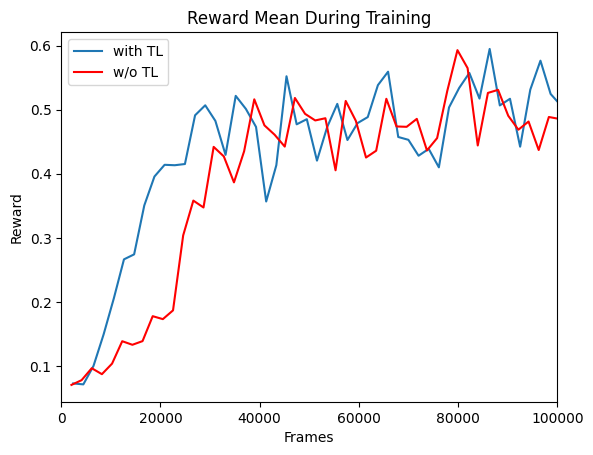

In [44]:
plt.xlabel('Frames')
plt.ylabel('Reward')
plt.xlim(0,1e5)

transfer_file_path = 'storage/TransferModel/events.out.tfevents.1698914292.StevoHunchos-MacBook-Pro.local'
event_acc = EventAccumulator(transfer_file_path)
event_acc.Reload()
reward_mean = event_acc.Scalars('return_mean')
policy_loss = event_acc.Scalars('policy_loss')

x_points = []
y_points = []
for scalar_event in reward_mean:
    step = scalar_event.step
    value = scalar_event.value
    x_points.append(step-1e5)
    y_points.append(value)
plt.plot(x_points, y_points, label='with TL')

transfer_file_path = 'storage/ControlModel/events.out.tfevents.1698914366.StevoHunchos-MacBook-Pro.local'
event_acc = EventAccumulator(transfer_file_path)
event_acc.Reload()
reward_mean = event_acc.Scalars('return_mean')
policy_loss = event_acc.Scalars('policy_loss')
x_points = []
y_points = []
for scalar_event in reward_mean:
    step = scalar_event.step
    value = scalar_event.value
    x_points.append(step)
    y_points.append(value)
plt.plot(x_points, y_points, color='red', label='w/o TL')
plt.legend()
plt.title('Reward Mean During Training')
plt.savefig('./storage/_graphs/reward_mean')



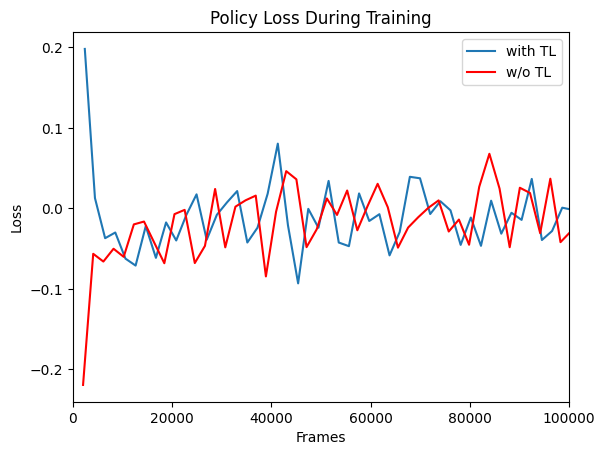

In [43]:
plt.xlabel('Frames')
plt.ylabel('Loss')
plt.xlim(0,1e5)

transfer_file_path = 'storage/TransferModel/events.out.tfevents.1698914292.StevoHunchos-MacBook-Pro.local'
event_acc = EventAccumulator(transfer_file_path)
event_acc.Reload()
reward_mean = event_acc.Scalars('return_mean')
policy_loss = event_acc.Scalars('policy_loss')

x_points = []
y_points = []
for scalar_event in policy_loss:
    step = scalar_event.step
    value = scalar_event.value
    x_points.append(step-1e5)
    y_points.append(value)
plt.plot(x_points, y_points, label='with TL')

transfer_file_path = 'storage/ControlModel/events.out.tfevents.1698914366.StevoHunchos-MacBook-Pro.local'
event_acc = EventAccumulator(transfer_file_path)
event_acc.Reload()
reward_mean = event_acc.Scalars('return_mean')
policy_loss = event_acc.Scalars('policy_loss')
x_points = []
y_points = []
for scalar_event in policy_loss:
    step = scalar_event.step
    value = scalar_event.value
    x_points.append(step)
    y_points.append(value)
plt.plot(x_points, y_points, color='red', label='w/o TL')
plt.legend()
plt.title('Policy Loss During Training')
plt.savefig('./storage/_graphs/policy_loss')

